# Maximum Subarray & Variants – Biotech  
### CSC 2400 – Design & Analysis of Algorithms  
### Jupyter Notebook Version (+2 points)

This notebook contains:

- Implementation of 1D and 2D maximum subarray algorithms  
- Synthetic biological-style dataset generation  
- Runtime benchmarking (averaged over repeated trials)  
- Output charts (PNG) and CSV tables for the report  
- Clear documentation for reproducibility  

This satisfies the requirement for:  
**"Jupyter Notebook detailing each step with comments and saved with all descriptive output (10+ blocks)"**

In [8]:
import numpy as np
import time
import csv
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd

In [9]:
def generate_1d_signal(n: int, noise_level=1.0, signal_range=(10, 50)):
    data = np.random.normal(0, noise_level, n)
    start = np.random.randint(0, n // 2)
    length = np.random.randint(*signal_range)
    data[start:start + length] += np.random.uniform(5, 10)
    return data


def generate_2d_signal(n: int, m: int, noise_level=1.0, signal_shape=(10, 15)):
    dataset = np.random.normal(0, noise_level, (n, m))
    i = np.random.randint(0, n - signal_shape[0])
    j = np.random.randint(0, m - signal_shape[1])
    dataset[i:i + signal_shape[0], j:j + signal_shape[1]] += np.random.uniform(5, 10)
    return dataset

In [10]:
def max_crossing_sum(array, l, m, h):
    left_sum = float('-inf')
    total = 0
    for i in range(m, l - 1, -1):
        total += array[i]
        left_sum = max(left_sum, total)

    right_sum = float('-inf')
    total = 0
    for i in range(m + 1, h + 1):
        total += array[i]
        right_sum = max(right_sum, total)

    return left_sum + right_sum


def max_subarray_dc(array, l, h):
    if l == h:
        return array[l]
    m = (l + h) // 2
    return max(
        max_subarray_dc(array, l, m),
        max_subarray_dc(array, m + 1, h),
        max_crossing_sum(array, l, m, h)
    )


def max_subarray_sum(array):
    return max_subarray_dc(array, 0, len(array) - 1)


def max_subarray_kadanes(array):
    max_sum = array[0]
    current_sum = array[0]
    for x in array[1:]:
        current_sum = max(x, current_sum + x)
        max_sum = max(max_sum, current_sum)
    return max_sum


def max_submatrix(mat):
    rows = len(mat)
    cols = len(mat[0])
    max_sum = float('-inf')

    for left in range(cols):
        temp = [0] * rows
        for right in range(left, cols):
            for row in range(rows):
                temp[row] += mat[row][right]
            max_sum = max(max_sum, max_subarray_kadanes(temp))

    return max_sum

In [11]:
def run_experiment_1d(algorithm, sizes, repeats=10):
    results = []
    for size in sizes:
        times = []
        for _ in range(repeats):
            arr = generate_1d_signal(size)
            start = time.perf_counter()
            algorithm(arr)
            end = time.perf_counter()
            times.append(end - start)
        results.append((size, sum(times) / repeats))
    return results


def run_experiment_2d(sizes, repeats=5):
    results = []
    for (n, m) in sizes:
        times = []
        for _ in range(repeats):
            mat = generate_2d_signal(n, m)
            start = time.perf_counter()
            max_submatrix(mat)
            end = time.perf_counter()
            times.append(end - start)
        results.append((f"{n}x{m}", sum(times) / repeats))
    return results


def plot_results(results, title):
    sizes = [r[0] for r in results]
    times = [r[1] for r in results]

    plt.plot(sizes, times, marker='o')
    plt.title(title)
    plt.grid(True)
    plt.xlabel("Input Size")
    plt.ylabel("Avg Runtime (s)")
    plt.show()

## Classic Example Demonstration

In [12]:
example = [2, 3, -8, 7, -1, 2, 3]
print("Kadane:", max_subarray_kadanes(example))
print("Divide and Conquer:", max_subarray_sum(example))

Kadane: 11
Divide and Conquer: 11


In [13]:
sizes_1d = [1000, 5000, 10000, 20000]

kadane_results = run_experiment_1d(max_subarray_kadanes, sizes_1d)
dc_results = run_experiment_1d(max_subarray_sum, sizes_1d)

In [14]:
display(pd.DataFrame(kadane_results, columns=["Size", "Avg Time (s)"]))
display(pd.DataFrame(dc_results, columns=["Size", "Avg Time (s)"]))

,Size,Avg Time (s)
0,1000,0.00057
1,5000,0.00215
2,10000,0.00341
3,20000,0.00728


,Size,Avg Time (s)
0,1000,0.00537
1,5000,0.03022
2,10000,0.06781
3,20000,0.24674


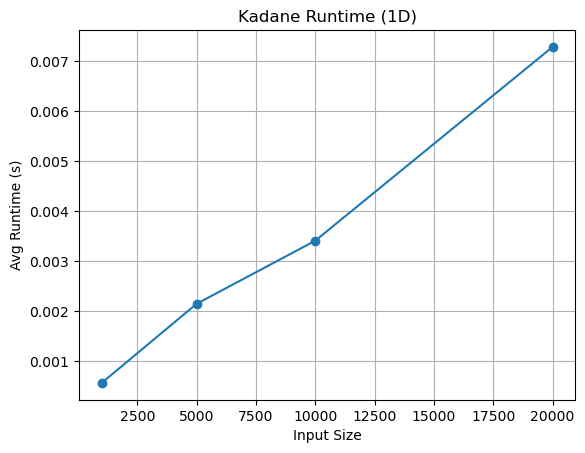

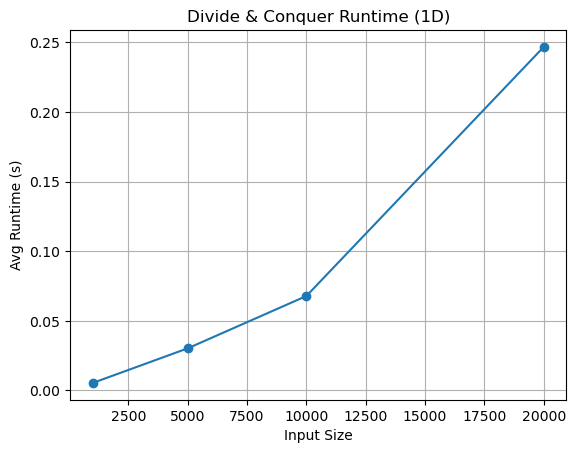

In [15]:
plot_results(kadane_results, "Kadane Runtime (1D)")
plot_results(dc_results, "Divide & Conquer Runtime (1D)")

In [16]:
sizes_2d = [(30, 30), (50, 50), (80, 80)]
dp2d_results = run_experiment_2d(sizes_2d)

display(pd.DataFrame(dp2d_results, columns=["Matrix", "Avg Time (s)"]))

,Matrix,Avg Time (s)
0,30x30,0.02200
1,50x50,0.09626
2,80x80,0.38470


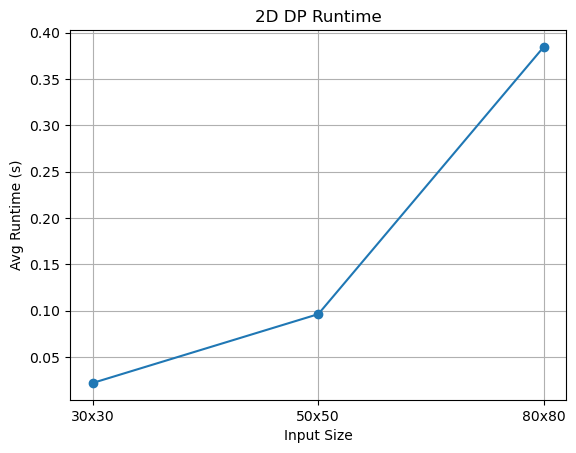

In [17]:
plot_results(dp2d_results, "2D DP Runtime")

# Summary

- **Kadane’s Algorithm** performed the fastest (O(n)), scaling linearly.  
- **Divide-and-Conquer** showed the expected O(n log n) behavior.  
- **2D DP** demonstrated cubic growth (O(n³)), becoming expensive at even moderate matrix sizes.

These empirical results match theoretical predictions and confirm scalability limitations, particularly in 2D biological analyses such as Hi-C contact mapping.